<a href="https://colab.research.google.com/github/om7503/Multiple-diseases-prediction-System/blob/main/Kidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy on Training data:  0.996875
Accuracy on Test data:  0.9875


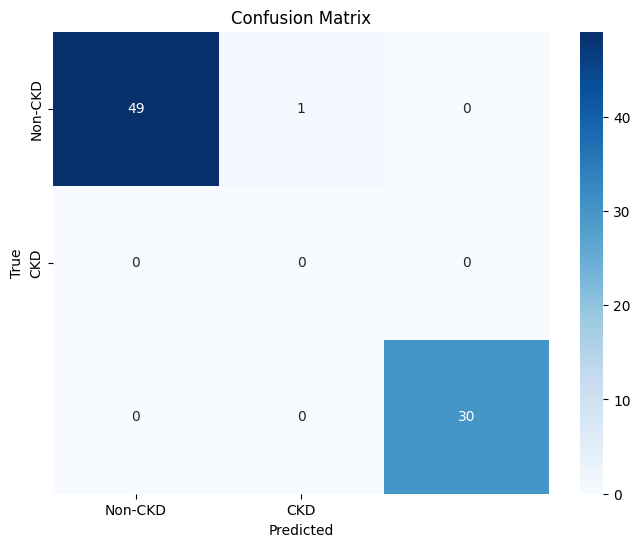

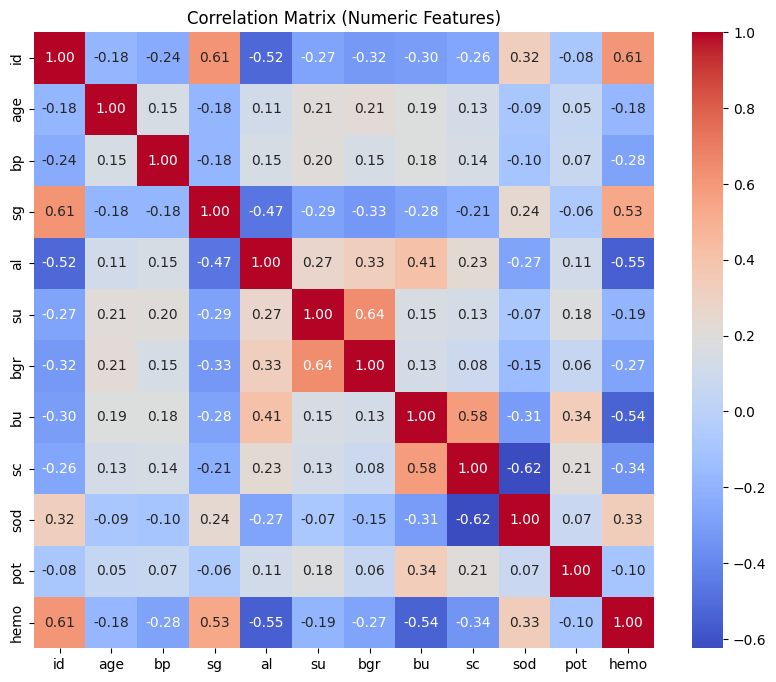

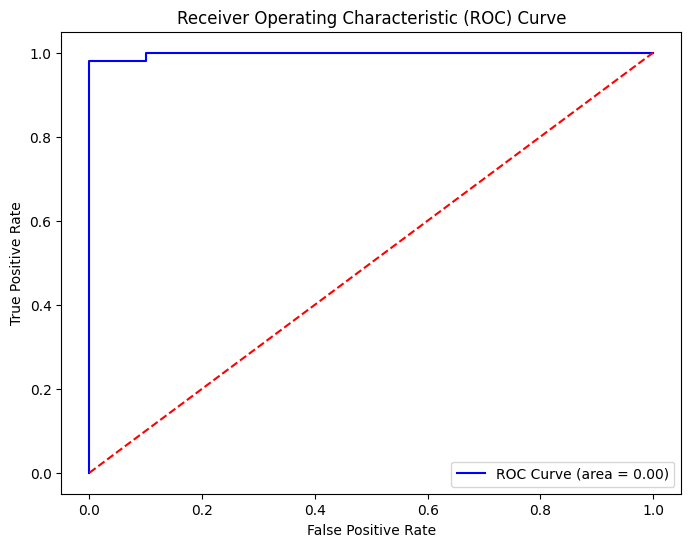

Model saved to ckd_model.sav


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import joblib

# Load the dataset
ckd_data = pd.read_csv('/content/kidney_disease.csv')  # Update the path accordingly

# Step 1: Handle missing values
# Fill numeric columns with the mean and categorical columns with the mode
ckd_data.fillna(ckd_data.mean(numeric_only=True), inplace=True)
ckd_data = ckd_data.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == 'object' else x)

# Step 2: Split features and target variable
target_column = 'classification'  # Adjust if your target column is named differently
X = ckd_data.drop(columns=target_column, axis=1)
Y = ckd_data[target_column]

# Step 3: Handle categorical data
X = pd.get_dummies(X, drop_first=True)

# Step 4: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Step 5: Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

# Step 6: Model Evaluation - Accuracy Score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

print('Accuracy on Training data: ', training_data_accuracy)

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

print('Accuracy on Test data: ', test_data_accuracy)

# Step 7: Confusion Matrix
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-CKD', 'CKD'], yticklabels=['Non-CKD', 'CKD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 8: Correlation Graph
# Step 8: Correlation Graph (only for numeric columns)
plt.figure(figsize=(10, 8))
numeric_columns = ckd_data.select_dtypes(include=[np.number])  # Select only numeric columns
correlation = numeric_columns.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Features)')
plt.show()


# Step 9: Receiver Operating Characteristic (ROC) Curve
y_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
fpr, tpr, thresholds = roc_curve(Y_test, y_prob, pos_label='ckd')  # Adjust pos_label based on your dataset
roc_auc = roc_auc_score(Y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Save the model to a .sav file
model_filename = 'ckd_model.sav'  # Name of the file to save the model
joblib.dump(model, model_filename)

print(f'Model saved to {model_filename}')
